In [1]:
import arviz as az
import matplotlib.pylab as plt
import matplotlib as mpl
import numpy as np
from scipy.special import erf

az.rcParams["plot.max_subplots"] = 80

First, load the output of our inference as an arviz InferenceData object:

In [2]:
data = az.from_netcdf("ar_chi_cost.cdf")
az.summary(data,["logR20",
                 "alpha",
                 "mMin",
                 "log_dmMin",
                 "mu_m1",
                 "sig_m1",
                 "log_f_peak",
                 "mMax",
                 "log_dmMax",
                 "bq",
                 "kappa",
                 "ar_chi_std",
                 "ar_chi_tau",
                 "ar_cost_std",
                 "ar_cost_tau",
                 "nEff_inj_per_event",
                 "min_log_neff"])

arviz - WARNING - Shape validation failed: input_shape: (1, 200), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
logR20,-1.499,0.904,-3.529,0.001,0.072,0.051,149.0,174.0,NaN
alpha,-3.741,0.331,-4.319,-3.125,0.034,0.024,99.0,130.0,NaN
mMin,9.084,0.865,7.419,10.671,0.057,0.040,230.0,185.0,NaN
log_dmMin,-0.310,0.352,-0.895,0.312,0.024,0.020,205.0,147.0,NaN
mu_m1,32.533,3.196,25.964,37.566,0.497,0.354,53.0,48.0,NaN
sig_m1,5.628,2.763,2.093,11.204,0.391,0.297,69.0,92.0,NaN
log_f_peak,-2.577,0.234,-2.935,-2.153,0.022,0.015,113.0,128.0,NaN
mMax,76.635,11.274,56.652,95.843,0.735,0.523,230.0,116.0,NaN
log_dmMax,1.059,0.221,0.666,1.458,0.014,0.011,208.0,107.0,NaN
bq,2.347,0.991,0.547,4.327,0.072,0.057,209.0,129.0,NaN


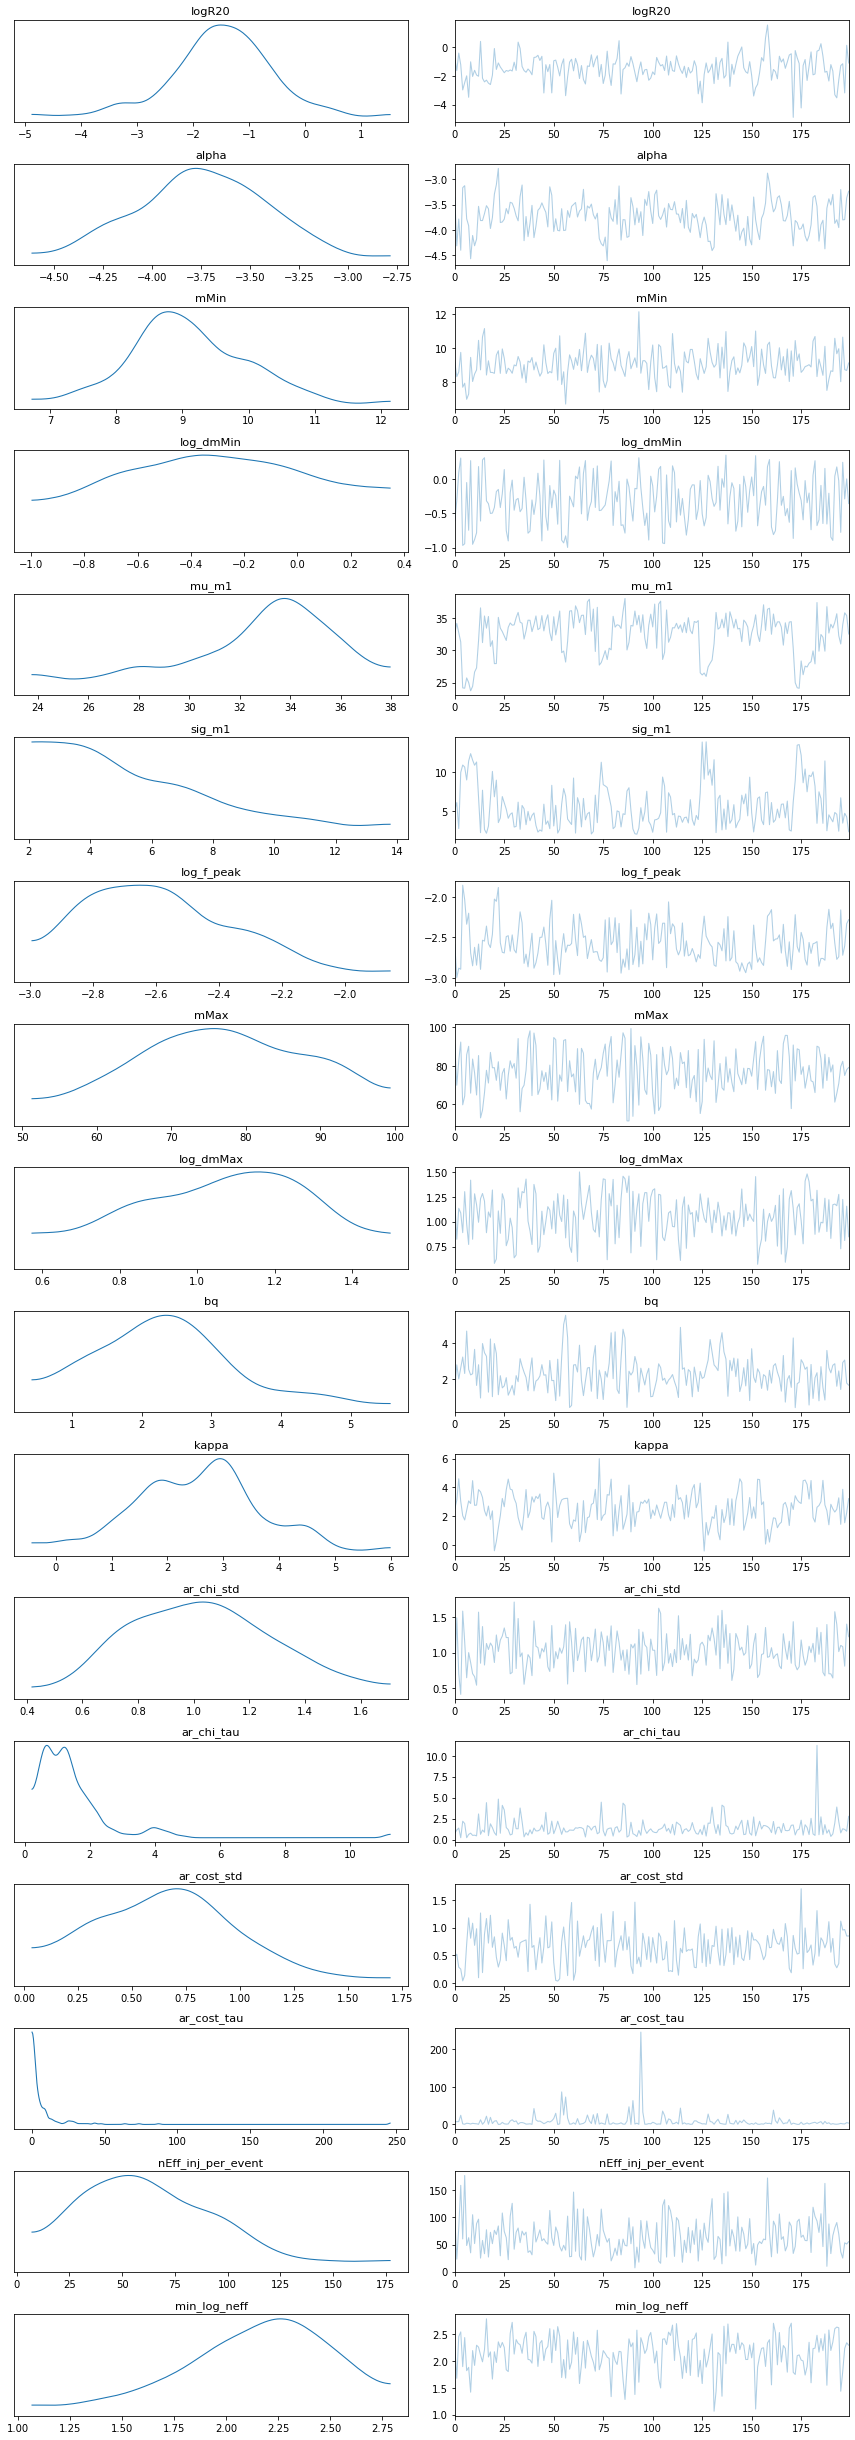

In [3]:
az.plot_trace(data,
              ["logR20",
               "alpha",
               "mMin",
               "log_dmMin",
               "mu_m1",
               "sig_m1",
               "log_f_peak",
               "mMax",
               "log_dmMax",
               "bq",
               "kappa",
               "ar_chi_std",
               "ar_chi_tau",
               "ar_cost_std",
               "ar_cost_tau",
               "nEff_inj_per_event","min_log_neff"], compact=True)
plt.tight_layout()
plt.show()

In [4]:
ar_data = np.load('ar_chi_cost_data.npy',allow_pickle=True)[()]
chi_values = np.exp(ar_data['chi_allSamples'])
cost_values = ar_data['cost_allSamples']

In [5]:
samps = data.posterior.stack(draws=("chain", "draw"))

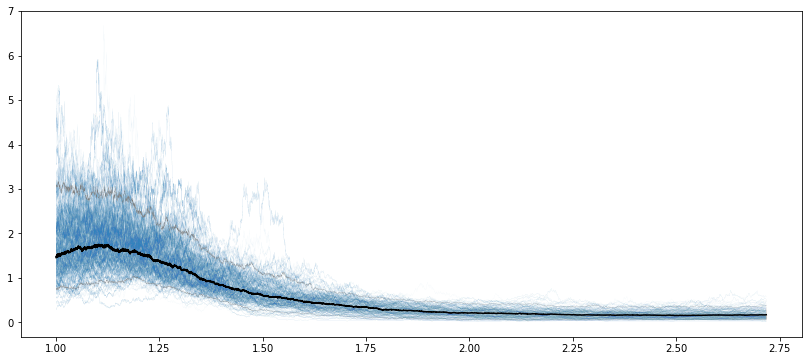

In [6]:
reduced_chis = chi_values[::50]
reduced_f_chis = samps['f_chis'][::50]

p_chis = np.zeros((reduced_chis.size,reduced_f_chis.shape[1]))
for i in range(reduced_f_chis.shape[1]):
    p_chis[:,i] = reduced_f_chis[:,i]
    p_chis[:,i] /= np.trapz(p_chis[:,i],reduced_chis)

fig,ax = plt.subplots(figsize=(14,6))
random_inds = np.random.choice(np.arange(p_chis.shape[1]),600)
for i in random_inds:
    ax.plot(reduced_chis,p_chis[:,i],color='#3182bd',alpha=0.1,lw=0.1,zorder=0)

ax.plot(reduced_chis,np.median(p_chis,axis=1),color='black')
ax.plot(reduced_chis,np.quantile(p_chis,0.05,axis=1),color='grey',lw=0.15)
ax.plot(reduced_chis,np.quantile(p_chis,0.95,axis=1),color='grey',lw=0.15)

plt.show()

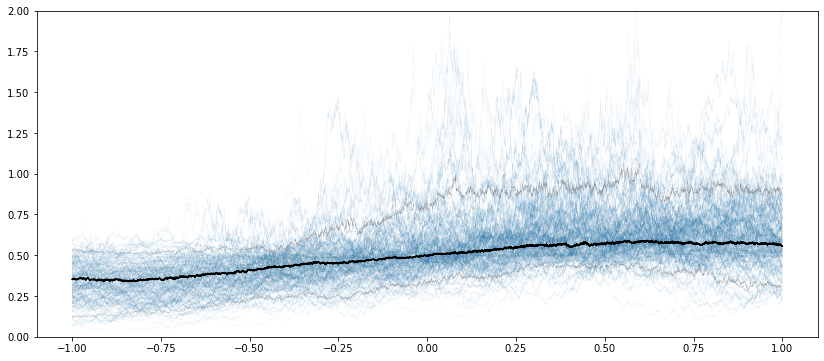

In [7]:
reduced_costs = cost_values[::50]
reduced_f_costs = samps['f_cost'][::50]

p_costs = np.zeros((reduced_costs.size,reduced_f_costs.shape[1]))
for i in range(reduced_f_costs.shape[1]):
    p_costs[:,i] = reduced_f_costs[:,i]
    p_costs[:,i] /= np.trapz(p_costs[:,i],reduced_costs)

fig,ax = plt.subplots(figsize=(14,6))
random_inds = np.random.choice(np.arange(p_costs.shape[1]),600)
for i in random_inds:
    ax.plot(reduced_costs,p_costs[:,i],color='#3182bd',alpha=0.1,lw=0.1,zorder=0)

ax.plot(reduced_costs,np.median(p_costs,axis=1),color='black')
ax.plot(reduced_costs,np.quantile(p_costs,0.05,axis=1),color='grey',lw=0.15)
ax.plot(reduced_costs,np.quantile(p_costs,0.95,axis=1),color='grey',lw=0.15)

ax.set_ylim(0,2)

plt.show()

In [8]:
likelihood_data = data.log_likelihood.stack(draws=("chain", "draw"))

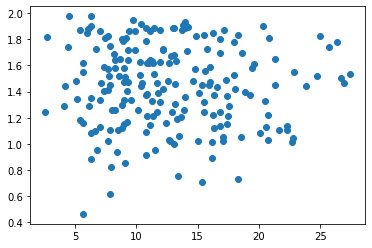

In [10]:
test = (np.max(np.log(samps['f_chis']),axis=0)-np.min(np.log(samps['f_chis']),axis=0))**2
#plt.scatter(test,likelihood_data['chi_elastic'])
plt.scatter(test,samps['ar_chi_tau'])